이러할 땐 윌콕슨 부호 순위 검정이 일반적으로 많이 사용된다. 정규분포를 따르지 않는 자료는 이상치가 많이 존재하거나 분포의 모양이 대칭이 아니기 때문에 t-test 등의 모수적인 방법을 사용할 수 없다. 이러한 경우, 윌콕슨 부호 순위 검정을 사용하여 비모수적으로 두 집단 간의 차이를 검정할 수 있다.
또한, 윌콕슨 부호 순위 검정은 다중 검정을 수행할 때에도 활용된다. 각각의 가설을 검정하는 것보다는 전체적인 가설 집합의 검정을 수행하게 되는데, 이 때 윌콕슨 부호 순위 검정을 비모수적인 방법이기 때문에 다중 검정에서도 일반적으로 많이 사용된다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

정규분포를 따르지 않는 데이터 생성

In [4]:
pre_treatment = np.random.rand(20) + 1
post_treatment = np.random.rand(20) + 2

# data 프레임 생성
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment,
})

# print(data)

# data csv 파일로 저장
data.to_csv("./data/non_normal_data.csv", index=False, encoding='utf-8')

데이터 가져오기

In [7]:
from scipy.stats import wilcoxon

# 데이터 가져오기
treatment_data = pd.read_csv('./data/non_normal_data.csv')

# 윌콕슨 부호 순위 검정 수행
stat, p =wilcoxon(treatment_data['pre_treatment'], treatment_data['post_treatment'])

print(stat, p)

0.0 1.9073486328125e-06


검정 통계량이 0.0이므로 pre_treatment와 post_treatment의 값이 서로 같은 경우의 순위 합계를 나타낸다.<br>
p-value는 0.05보다 작으므로, H0을 기각할 수 있다. 따라서 pre_treatment와 post_treatment의 분포는 다르다고 할 수 있다.

<br>
즉 이 결과는 pre_treatment와 post_treatment의 값이 변화했는지에 대한 유의성 검정 결과를 나타내며, 두 변수 간의 차이가 통계적으로 유의미하다는 것을 보여줌

In [8]:
if p > 0.05:
    print("fail to reject HO")
else:
    print("reject HO")

reject HO


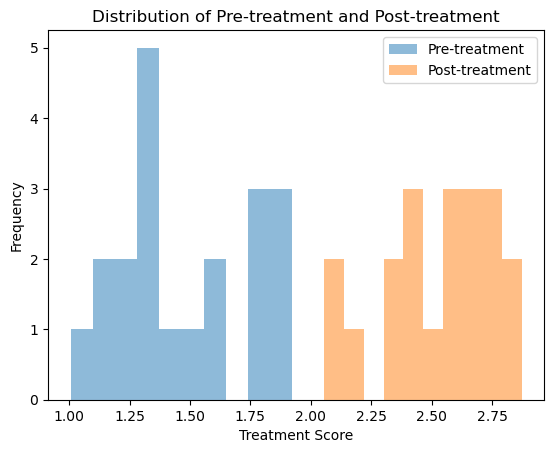

In [9]:
# 분포 시각화
fig, ax = plt.subplots()
ax.hist(data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

pre-tretment : 값들이 대체적으로 중앙에 몰려있다.
post-treatment : 분포가 비대칭적으로 치우쳐 있고, 값들이 오른쪽으로 치우쳐져 있다.

<br>
이는 이 변수가 대부분 높은 값을 가지며, 일부 낮은 값들이 존재하기 때문이다. 이렇게 대칭성이 없는 분포는 정규분포와는 다른 분포를 따르고 있을 가능성이 높다.